# Hotel Booking Demand

## RafaCastle

## Main objective of the analysis

In this analysis we are going to explore a data set wich contains the reseravtion history of two hotels, a Resort and a City Hotel. Our main goal will be to fit a classification model with the data in order to predict if customers will cancel their reservation. Once we have the model, we will analyse which features of the dataset are the most important to predict a cancelation.

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5

## Description of the data set and a summary of its attributes

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. These are the features of the data set:

1.   hotel: Type of hotel of the reservation, City hotel or Resort hotel.                                            
2.   lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
3.   arrival_date_year: Year of arrival date          
4.   arrival_date_month: Month of arrival date        
5.   arrival_date_week_number: Week number of year for arrival date        
6.   arrival_date_day_of_month: Day of arrival date       
7.   stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel     
8.   stays_in_week_nights:  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel          
9.   adults: Number of adults                           
10.  children: Number of children                        
11.  babies: Number of babies                          
12.  meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal        
13.  country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
14.  market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
15.  distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16.  is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)     
17.  previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
18.  previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
19.  reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.    
20.  assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
21.  booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS   
22.  deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No 
23.  agent: ID of the travel agency that made the booking                   
24.  company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for        
25.  days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
26.  customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it;
27.  adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights 
28.  required_car_parking_spaces: Number of car parking spaces required by the custome
29.  total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
30. reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
31. reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to
32. is_canceled: Value indicating if the booking was canceled (1) or not (0)

In [2]:
df=pd.read_csv("hotel_bookings.csv")
df_copy=df
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Exploration


We are going to divide the data exploration in 2 sections:

1. Data cleaning: Detect and treat missing values
2. Bi-variable analysis: We'll determine the interaction between some variables by building visualization tools.

First we are going to take a look into the data and see if there are some null values, let's take a look into the shape of the dataframe:

In [3]:
df.shape

(119390, 32)

Now let's see which columns don't have 119390 non-null values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Filling empty data from the column "country", the other columns will be filled when needed.

In [5]:
df = df.fillna({"country": "nan"})
countries=df[df["is_canceled"]==0]["country"].value_counts()

The next cell shows the percentage of where guests come from according to their country, below it is the dataframe which contains this information from highest to lowest, most of the guests come from Portugal (28%).

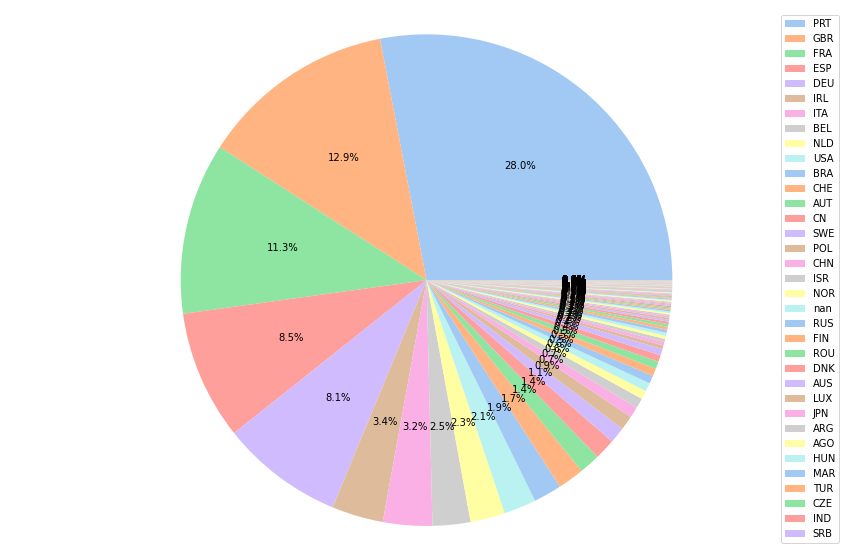

,Number of guests,Percentage
PRT,21071,28.032621
GBR,9676,12.872841
FRA,8481,11.283027
ESP,6391,8.502514
DEU,6069,8.074129
...,...,...
DJI,1,0.001330
FRO,1,0.001330
SLE,1,0.001330
BFA,1,0.001330


In [6]:
#data
df_countries=pd.DataFrame(countries)
df_countries.rename(columns={"country":"Number of guests"}, inplace=True)
df_countries["Percentage"]=df_countries["Number of guests"]/sum(df_countries["Number of guests"])*100

#labels and colors
lab=df_countries.index[:35]
colors = sns.color_palette('pastel')[0:165]

#plotting
plt.figure(figsize=(15, 10))
plt.pie(countries,autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.legend(lab, loc='right')
plt.show()
df_countries

## What are the bussiest months?

Filling empty data from the column "children" and giving an order to the months

In [7]:
df = df.fillna({"children": 0})
df1=df[df["adults"]+df["children"]>0]

order=["January", 
       "February", 
       "March", 
       "April", 
       "May", 
       "June", 
       "July", 
       "August", 
       "September", 
       "October", 
       "November", 
       "December"]
df1["arrival_date_month"]=pd.Categorical(df1["arrival_date_month"], categories=order, ordered=True)

<ipython-input-7-1a097468bce6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["arrival_date_month"]=pd.Categorical(df1["arrival_date_month"], categories=order, ordered=True)


,visits p/m resort %,visits p/m city %
arrival_date_month,,
January,1.985051,3.379388
February,2.810419,4.484711
March,3.020612,5.829219
April,3.269762,6.766931
May,3.224462,7.448245
June,2.757871,7.143828
July,2.762099,4.874896
August,2.955983,5.416082
September,2.815855,6.697169


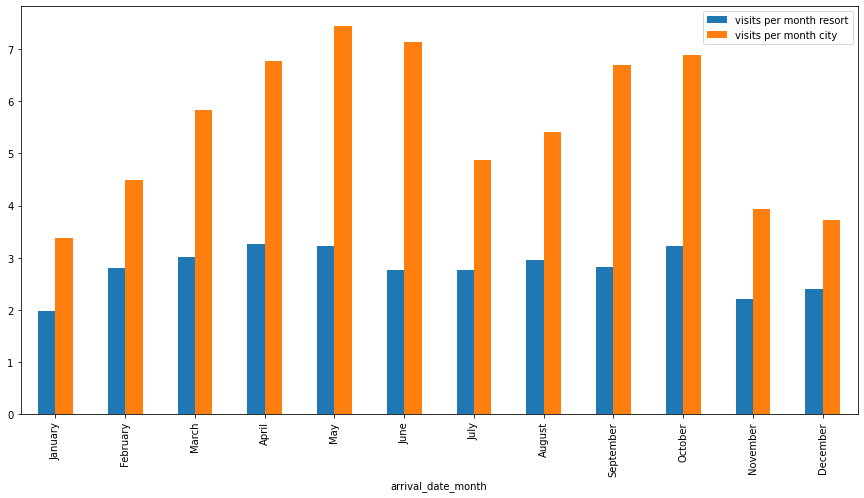

In [8]:
# grouping by type of hotel
df_resort=df1.groupby("hotel").get_group("Resort Hotel")
df_city=df1.groupby("hotel").get_group("City Hotel")

# counting visits per month
df_resort1=pd.DataFrame(df_resort.groupby("arrival_date_month")["hotel"].count()).rename(
                columns={"hotel":"visits per month resort"})
df_city1=pd.DataFrame(df_city.groupby("arrival_date_month")["hotel"].count()).rename(
                columns={"hotel":"visits per month city"})
df_busy=pd.merge(df_resort1, df_city1, left_index=True, right_index=True, how="outer")

# cleaning data, only 2016 is complete, 2015 and 2017 have the lasts and the firsts months respectively
months_2015=set(df_resort.groupby("arrival_date_year").get_group(2015)["arrival_date_month"])
months_2016=set(df_resort.groupby("arrival_date_year").get_group(2016)["arrival_date_month"])
months_2017=set(df_resort.groupby("arrival_date_year").get_group(2017)["arrival_date_month"])

# July and august appear in 3 years and the other months only in 2, that's why I divide it by 2.
df_busy.loc["July"]=df_busy.loc["July"]*(2/3) 
df_busy.loc["August"]=df_busy.loc["August"]*(2/3)
df_busy=df_busy/2

#showing results
total=sum(df_busy["visits per month city"])+sum(df_busy["visits per month resort"])
df_busy["visits per month resort"]=df_busy["visits per month resort"]/total*100
df_busy["visits per month city"]=df_busy["visits per month city"]/total*100
df_busy.plot(kind="bar",figsize=(15,7.5));
df_busy.rename(columns={"visits per month resort":"visits p/m resort %","visits per month city":"visits p/m city %"})

## How long do people stay in hotels?

The nights are added on weekends and during the week

In [9]:
df_resort["nights stayed"] = df_resort["stays_in_weekend_nights"] + df_resort["stays_in_week_nights"]
df_city["nights stayed"] = df_city["stays_in_weekend_nights"] + df_city["stays_in_week_nights"]

<ipython-input-9-f33a9070d920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resort["nights stayed"] = df_resort["stays_in_weekend_nights"] + df_resort["stays_in_week_nights"]
<ipython-input-9-f33a9070d920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city["nights stayed"] = df_city["stays_in_weekend_nights"] + df_city["stays_in_week_nights"]


The percentage of people who stay in the hotels is obtained depending on the number of nights and the type of hotel, in most cases the clients stay between 2 and 3 nights in the city hotel and between 1 and 7 in the resotrt.

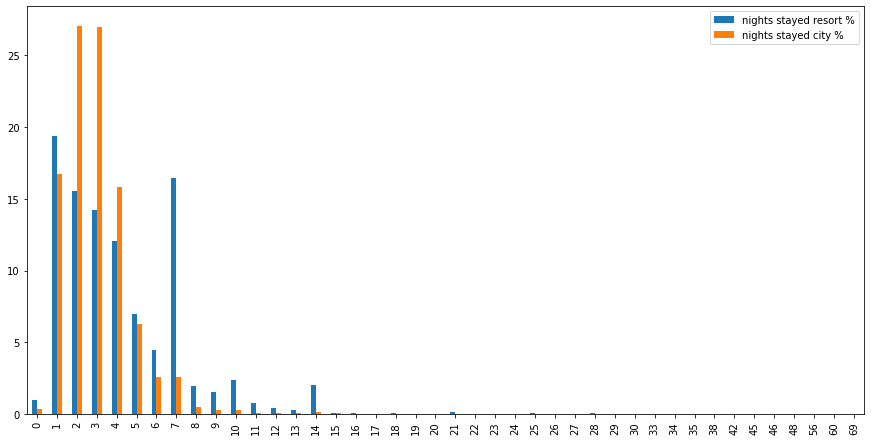

In [10]:
df_resortNS=pd.DataFrame(df_resort["nights stayed"].value_counts())
df_cityNS=pd.DataFrame(df_city["nights stayed"].value_counts())
df_resortNS=df_resortNS/sum(df_resortNS["nights stayed"])*100
df_cityNS=df_cityNS/sum(df_cityNS["nights stayed"])*100
df_nights_stayed=pd.merge(df_resortNS, df_cityNS,
                          left_index=True, right_index=True, how="outer").rename(
                            columns={"nights stayed_x":"nights stayed resort %","nights stayed_y":"nights stayed city %"})
df_nights_stayed.plot.bar(figsize=(15,7.5));

The graph shows us that people mostly tends to stay in the City Hotel for 3 or 4 days, while at the resort they stay for a week or for 1 to 4 days

## How many reservations were canceled?

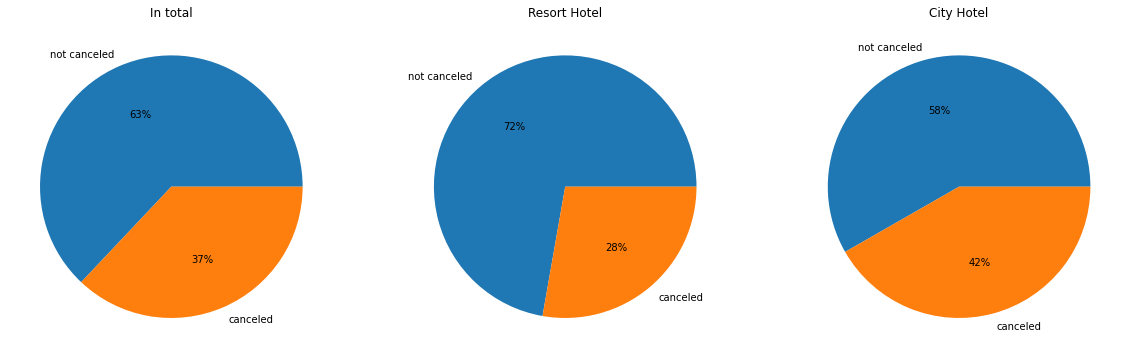

In [11]:
# counting cancellations
pplot1=df["is_canceled"].value_counts()
pplot2=df[df["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
pplot3=df[df["hotel"]=="City Hotel"]["is_canceled"].value_counts()

#labels
labels=["not canceled","canceled"]

#plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.pie(pplot1, autopct='%.0f%%',labels=labels);
ax2.pie(pplot2, autopct='%.0f%%',labels=labels);
ax3.pie(pplot3, autopct='%.0f%%',labels=labels);
ax1.title.set_text('In total')
ax2.title.set_text('Resort Hotel')
ax3.title.set_text('City Hotel')
plt.show()

## Which month has the highest number of cancellations?

,arrival_date_month,canceled %
13,June,41.485955
14,April,40.783535
11,May,39.702886
18,September,39.190476
16,October,38.090966
9,August,37.782267
10,July,37.464410
21,December,35.034768
20,February,33.445107
19,March,32.227682


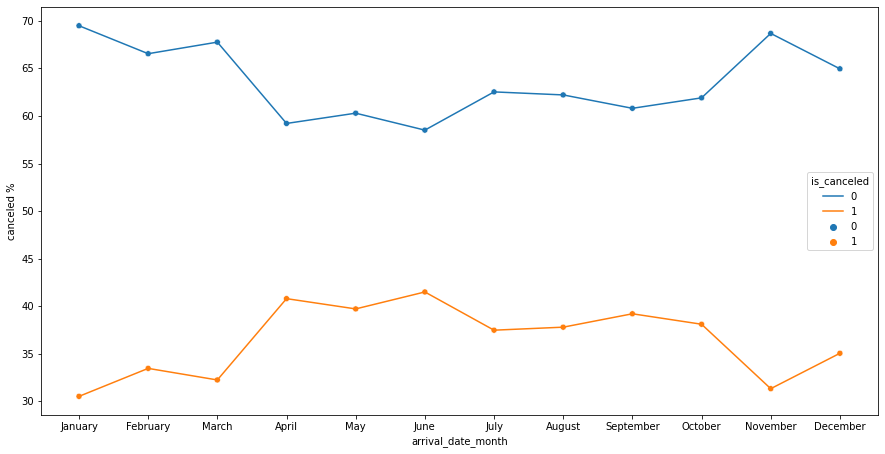

In [12]:
# A dataframe is obtained that counts the values per month and per cancellation
ddd=pd.DataFrame(df1[["arrival_date_month","is_canceled"]].value_counts()).reset_index().set_index("arrival_date_month")
ddd["percentages"]=ddd[0]
for month in order:
    ddd["percentages"].loc[month]=ddd["percentages"].loc[month].sum()
ddd["canceled %"]=ddd[0]/ddd["percentages"]*100
ddd.reset_index(inplace=True)

# The percentage of cancellations is obtained and the percentage canceled and not canceled per month is plotted
plt.figure(figsize=(15, 7.5))
sns.scatterplot(data=ddd,x="arrival_date_month",y="canceled %",hue="is_canceled");
sns.lineplot(data=ddd,x="arrival_date_month",y="canceled %",hue="is_canceled");
ddd[ddd["is_canceled"]==1][["arrival_date_month","canceled %"]].sort_values(by="canceled %", ascending=False)

The month with the highest number of cancellations in total is June, folowed by April and May.

## Actions taken for data cleaning and feature engineering

We can take a look at the correlation matrix in order to which one are the variables that influence a cancellation. For that we need to give the columns that are strings a categoric value, doing that, python will be able to search for the correlation between the variables. 

Other action taken for data cleaning would be when we ordered the months, or filling the empty spaces.

In [13]:
# objects columns
types=pd.DataFrame(df.dtypes).reset_index()
types.rename(columns={0:"type"},inplace=True)
objects=types[types["type"]=="object"]["index"]

# turning them into categories 
lab=LabelEncoder()
for i in objects:
    df[i+" cat"] = df[i].astype("category")
    lab.fit(df[i+" cat"].drop_duplicates())
    df[i+" cat"] = lab.transform(df[i])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal cat,country cat,market_segment cat,distribution_channel cat,reserved_room_type cat,assigned_room_type cat,deposit_type cat,customer_type cat,reservation_status cat,reservation_status_date cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,135,3,1,2,2,0,2,1,121
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,135,3,1,2,2,0,2,1,121
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,59,3,1,0,2,0,2,1,122
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,59,2,0,0,0,0,2,1,122
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,59,6,3,0,0,0,2,1,123


Correlation matrix

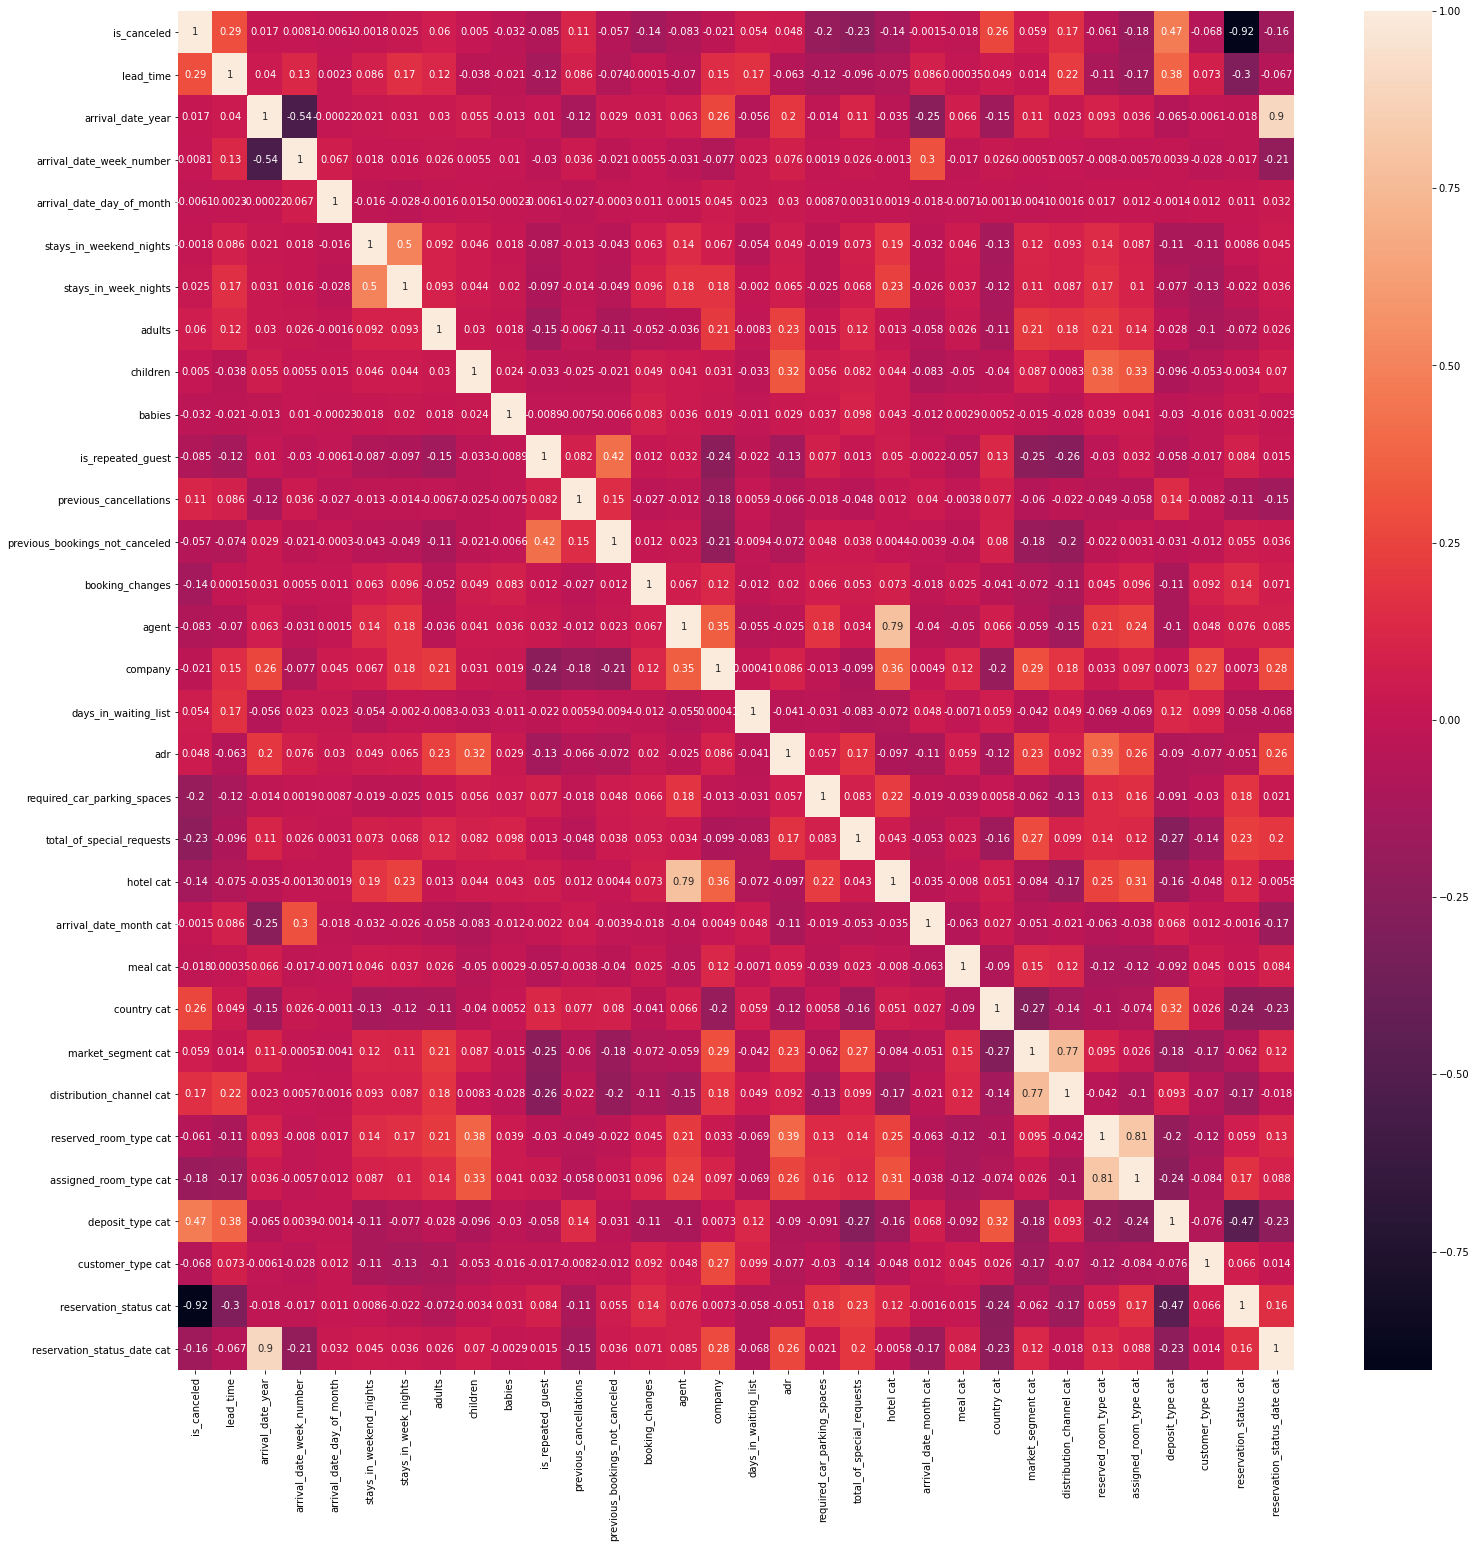

In [14]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True);

The features that have the highest correlation with the cancelations are the shown in the next cell

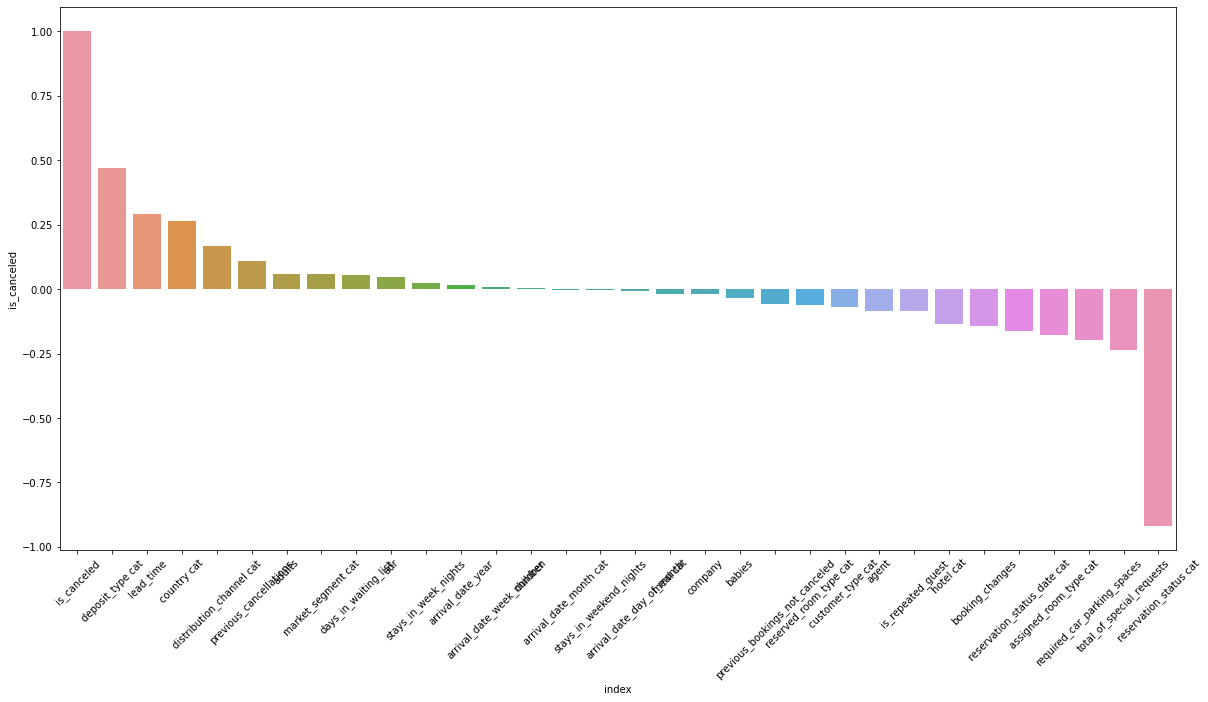

In [15]:
pplot1=df.corr()[["is_canceled"]].sort_values(by="is_canceled", ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(data=pplot1.reset_index(),x="index",y="is_canceled")
plt.xticks(rotation = 45);

## Summary of data exploration

In the exploratory data analysis we saw that most of the cancelations come from City Hotel, and most of these cancelations are made in the second trimester of the year. We also found the variables that have bigger correlation with the cancelation feature. In the next section we are going to analyse some of these variables more deeply.

## Training 3 classification models 

The classification models chosen are:

1. Logistic Regression
2. Decision Tree 
3. Random Forest

In the next cells we are going to prepare the data for the analysis by removing some columns that would make too easy the classification (like the reservation status), or some others that wouldn't improve it at all.

In [16]:
numbers=types[types["type"]!="object"]["index"][1:] # excluding "is_canceled"
numbers_l = list(numbers)
numbers_l.remove("days_in_waiting_list") # 0 for all cancelations

objects_l = list(objects)
objects_l.remove("country")
objects_l.remove("assigned_room_type") # cancelations have no room
objects_l.remove("reservation_status") # too easy to predict...
objects_l.remove("reservation_status_date") # too easy to predict...

columns_l = numbers_l + objects_l
X = df_copy[columns_l]
y = df_copy["is_canceled"] # the predicted variable is given

Filling null spaces

In [17]:
numbers_d={}
for i in numbers_l:
    numbers_d[i]=0.0

objects_d={}
for i in objects_l:
    objects_d[i]="Unknown"

df_copy.fillna(numbers_d,inplace=True);
df_copy.fillna(objects_d,inplace=True);

Turning into categories and preprocessing functions.

In [18]:
objects_t = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown='ignore'))])
numbers_t = SimpleImputer(strategy="constant")
preprocessor = ColumnTransformer(transformers=[("num", numbers_t,numbers_l),("cat", objects_t, objects_l)])

Lets set the models and the training-test split in a 75% - 25% array.

In [19]:
models=[("Logistic Regression", LogisticRegression(random_state=0,n_jobs=-1)),
        ("Decision Tree", DecisionTreeClassifier(random_state=0)),
        ("Random Forest", RandomForestClassifier(random_state=0,n_jobs=-1))]
split=KFold(n_splits=4, shuffle=True, random_state=0)

## Summary of the trainning models

In the next cell we will see the precision, recall and accuarcy scores, besides the most important features for each one of the models.

In [20]:
models_list=[]
c=0
for name, model in models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    cv_acc = cross_val_score(model_steps, X, y, cv=split,
                                 scoring="accuracy",n_jobs=-1)
    cv_rec = cross_val_score(model_steps, X, y, cv=split,
                                 scoring="recall",n_jobs=-1)
    cv_pre = cross_val_score(model_steps, X, y, cv=split,
                                 scoring="precision",n_jobs=-1)
    acc = round(np.mean(cv_acc), 4)
    rec = round(np.mean(cv_rec), 4)
    pre = round(np.mean(cv_pre), 4)
    print()
    print(f"{name} Accuarcy: {acc} Recall: {rec} Precision: {pre}")
    models_list.append({name:[acc,rec,pre]})
    c=c+1
    if c!=4:
        model_steps.fit(X,y)
        onehot_columns = list(model_steps.named_steps['preprocessor'].
                          named_transformers_['cat'].
                          named_steps['onehot'].
                          get_feature_names(input_features=objects_l))
        feat_imp_list = numbers_l + onehot_columns 
        print()
        print(f"10 most important features in {name}")
        print()
        feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
            model_steps.named_steps['model'],
            feature_names=feat_imp_list)
        print(feat_imp_df[["feature","weight"]].head(10))
        print()


Logistic Regression Accuarcy: 0.7708 Recall: 0.5401 Precision: 0.7727

10 most important features in Logistic Regression

                       feature    weight
0      deposit_type_Non Refund  0.609389
1       previous_cancellations  0.376444
2      customer_type_Transient  0.358455
3        market_segment_Groups  0.253392
4   distribution_channel_TA/TO  0.179682
5             hotel_City Hotel  0.162925
6         reserved_room_type_A  0.129790
7                      meal_BB  0.073019
8     market_segment_Online TA  0.055080
9  arrival_date_month_December  0.038333


Decision Tree Accuarcy: 0.8271 Recall: 0.7732 Precision: 0.7631

10 most important features in Decision Tree

                     feature    weight
0    deposit_type_Non Refund  0.237858
1                  lead_time  0.144141
2                        adr  0.090006
3  arrival_date_day_of_month  0.067286
4  total_of_special_requests  0.056238
5   arrival_date_week_number  0.047266
6                      agent  0.044594
7 

## Which of the classifier models best fits?

The random forest model shows the highest accuarcy, recall and precision scores.   

## Summary Key Findings and Insights

In the next cells we are going to plott the mos important features for the classification and analyse the graphs.

When the lead time is bigger, the cancelation percentage tends to grow, this behavior would be expected, anyone that has to wait 700 hundred days would cancel their reservation, as the plot shows us.

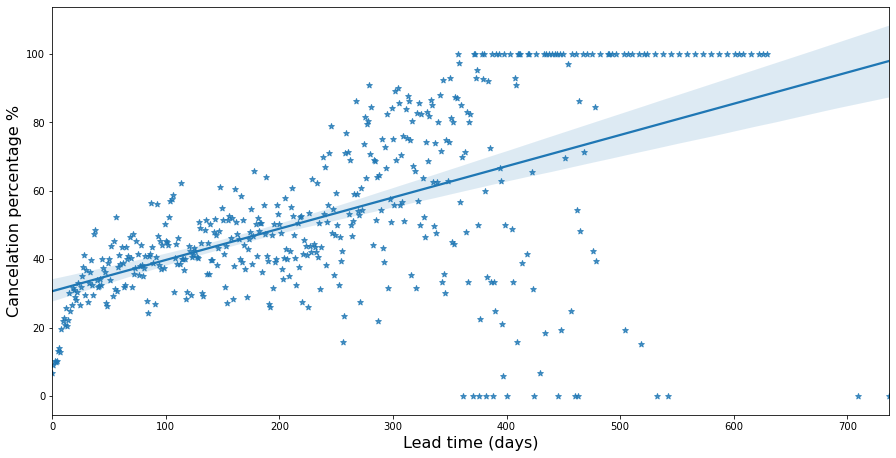

In [21]:
lead_cancel_data = df_copy.groupby("lead_time")["is_canceled"].describe()

plt.figure(figsize=(15, 7.5))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"].values * 100,marker="*")
plt.xlabel("Lead time (days)", fontsize=16)
plt.ylabel("Cancelation percentage %", fontsize=16)
plt.show()

Next let's see how the deposit type correlates with the cancelation status, we can see in the graph that clients who didn't make any deposit have more tendency to cancel their reservation. This makes sense too, people don't want to loose their deposits. 

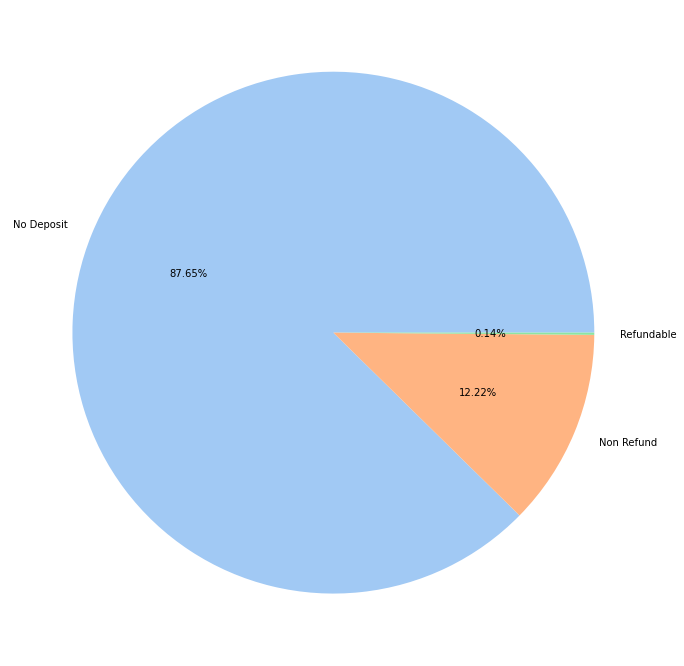

In [22]:
desposit_type_data = df.groupby('deposit_type cat')["is_canceled"].describe()
data = list(desposit_type_data["count"])
labels = ["No Deposit",
            "Non Refund",
            "Refundable"]
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12,12))
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

## Suggestions for next steps in analyzing this data

It would be interesting to evaluate how much rooms can the hotels oversell, if you kind of know how many of your clients are going to cancel their reservations, you could oversell some rooms and use your bussines in a more efficient way.